In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path
import glob


In [3]:
def create_array(review_files):
    reviews = list()
    for file in review_files:
        reviews.append(Path(file).read_text())
    return reviews

In [4]:
positive_review_files = glob.glob('C:/Users/user/Documents/Datasets/review_polarity.tar/txt_sentoken/pos/*.txt')
negative_review_files = glob.glob('C:/Users/user/Documents/Datasets/review_polarity.tar/txt_sentoken/neg/*.txt')

positive_reviews = create_array(positive_review_files)
negative_reviews = create_array(negative_review_files)



In [5]:
p_df = pd.DataFrame(zip(positive_reviews, np.repeat(1,1000)), columns=['Reviews','Polarity'])
n_df = pd.DataFrame(zip(negative_reviews, np.repeat(0,1000)), columns=['Reviews','Polarity'])


In [6]:
df = pd.concat([p_df, n_df], ignore_index = True)
df.head(-5)

,Reviews,Polarity
0,films adapted from comic books have had plenty...,1
1,every now and then a movie comes along from a ...,1
2,you've got mail works alot better than it dese...,1
3,""" jaws "" is a rare film that grabs your atten...",1
4,moviemaking is a lot like being the general ma...,1
...,...,...
1990,"man , this was one wierd movie . \nsimilar to ...",0
1991,"the king and i , a warner brothers animated , ...",0
1992,synopsis : cro-magnon ayla loses her mother to...,0
1993,salaries of hollywood top actors are getting o...,0


In [7]:
np.average(df['Reviews'].apply(lambda x: len(x)))

3893.002

In [8]:
def replace_enter(s):
    return s.replace('\n','')
df['Reviews'] = df['Reviews'].apply(replace_enter)

In [9]:
df['Reviews'][0]

'films adapted from comic books have had plenty of success , whether they\'re about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there\'s never really been a comic book like from hell before . for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid \'80s with a 12-part series called the watchmen . to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . in other words , don\'t dismiss this film because of its source . if you can get past the whole comic book thing , you might find another stumbling block in from hell\'s directors , albert and allen hughes . getting the hughes brothers to direct this seems almost as 

In [10]:
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from re import match

In [11]:
lemmatizer = WordNetLemmatizer()
porter = PorterStemmer()
def tokenize(s):
    new_tweet_arr = list()
    tweet_array = list(s.split(' '))
    
    return tweet_array

In [12]:
arr = df['Reviews'].apply(tokenize)
np.average(arr.apply(lambda x : len(x)))

748.292

In [13]:
arr[0]

['films',
 'adapted',
 'from',
 'comic',
 'books',
 'have',
 'had',
 'plenty',
 'of',
 'success',
 ',',
 'whether',
 "they're",
 'about',
 'superheroes',
 '(',
 'batman',
 ',',
 'superman',
 ',',
 'spawn',
 ')',
 ',',
 'or',
 'geared',
 'toward',
 'kids',
 '(',
 'casper',
 ')',
 'or',
 'the',
 'arthouse',
 'crowd',
 '(',
 'ghost',
 'world',
 ')',
 ',',
 'but',
 "there's",
 'never',
 'really',
 'been',
 'a',
 'comic',
 'book',
 'like',
 'from',
 'hell',
 'before',
 '.',
 'for',
 'starters',
 ',',
 'it',
 'was',
 'created',
 'by',
 'alan',
 'moore',
 '(',
 'and',
 'eddie',
 'campbell',
 ')',
 ',',
 'who',
 'brought',
 'the',
 'medium',
 'to',
 'a',
 'whole',
 'new',
 'level',
 'in',
 'the',
 'mid',
 "'80s",
 'with',
 'a',
 '12-part',
 'series',
 'called',
 'the',
 'watchmen',
 '.',
 'to',
 'say',
 'moore',
 'and',
 'campbell',
 'thoroughly',
 'researched',
 'the',
 'subject',
 'of',
 'jack',
 'the',
 'ripper',
 'would',
 'be',
 'like',
 'saying',
 'michael',
 'jackson',
 'is',
 'starting

In [14]:
list(filter(lambda st : match('^\w+$', st), arr[0]))

['films',
 'adapted',
 'from',
 'comic',
 'books',
 'have',
 'had',
 'plenty',
 'of',
 'success',
 'whether',
 'about',
 'superheroes',
 'batman',
 'superman',
 'spawn',
 'or',
 'geared',
 'toward',
 'kids',
 'casper',
 'or',
 'the',
 'arthouse',
 'crowd',
 'ghost',
 'world',
 'but',
 'never',
 'really',
 'been',
 'a',
 'comic',
 'book',
 'like',
 'from',
 'hell',
 'before',
 'for',
 'starters',
 'it',
 'was',
 'created',
 'by',
 'alan',
 'moore',
 'and',
 'eddie',
 'campbell',
 'who',
 'brought',
 'the',
 'medium',
 'to',
 'a',
 'whole',
 'new',
 'level',
 'in',
 'the',
 'mid',
 'with',
 'a',
 'series',
 'called',
 'the',
 'watchmen',
 'to',
 'say',
 'moore',
 'and',
 'campbell',
 'thoroughly',
 'researched',
 'the',
 'subject',
 'of',
 'jack',
 'the',
 'ripper',
 'would',
 'be',
 'like',
 'saying',
 'michael',
 'jackson',
 'is',
 'starting',
 'to',
 'look',
 'a',
 'little',
 'odd',
 'the',
 'book',
 'or',
 'graphic',
 'novel',
 'if',
 'you',
 'will',
 'is',
 'over',
 '500',
 'pages',

In [15]:
list(map(porter.stem, arr[0]))

['film',
 'adapt',
 'from',
 'comic',
 'book',
 'have',
 'had',
 'plenti',
 'of',
 'success',
 ',',
 'whether',
 "they'r",
 'about',
 'superhero',
 '(',
 'batman',
 ',',
 'superman',
 ',',
 'spawn',
 ')',
 ',',
 'or',
 'gear',
 'toward',
 'kid',
 '(',
 'casper',
 ')',
 'or',
 'the',
 'arthous',
 'crowd',
 '(',
 'ghost',
 'world',
 ')',
 ',',
 'but',
 "there'",
 'never',
 'realli',
 'been',
 'a',
 'comic',
 'book',
 'like',
 'from',
 'hell',
 'befor',
 '.',
 'for',
 'starter',
 ',',
 'it',
 'wa',
 'creat',
 'by',
 'alan',
 'moor',
 '(',
 'and',
 'eddi',
 'campbel',
 ')',
 ',',
 'who',
 'brought',
 'the',
 'medium',
 'to',
 'a',
 'whole',
 'new',
 'level',
 'in',
 'the',
 'mid',
 "'80",
 'with',
 'a',
 '12-part',
 'seri',
 'call',
 'the',
 'watchmen',
 '.',
 'to',
 'say',
 'moor',
 'and',
 'campbel',
 'thoroughli',
 'research',
 'the',
 'subject',
 'of',
 'jack',
 'the',
 'ripper',
 'would',
 'be',
 'like',
 'say',
 'michael',
 'jackson',
 'is',
 'start',
 'to',
 'look',
 'a',
 'littl',


In [16]:
def cleanup(l):
    without_punctuation = list(filter(lambda st : match('^\w+$', st), l))
    return list(map(lemmatizer.lemmatize, without_punctuation))


In [17]:
a = arr.apply(cleanup)
a

0       [film, adapted, from, comic, book, have, had, ...
1       [every, now, and, then, a, movie, come, along,...
2       [got, mail, work, alot, better, than, it, dese...
3       [jaw, is, a, rare, film, that, grab, your, att...
4       [moviemaking, is, a, lot, like, being, the, ge...
                              ...                        
1995    [if, anything, stigma, should, be, taken, a, a...
1996    [john, zardoz, is, a, goofy, cinematic, debacl...
1997    [the, kid, in, the, hall, are, an, acquired, t...
1998    [there, wa, a, time, when, john, carpenter, wa...
1999    [two, party, guy, bob, their, head, to, dance,...
Name: Reviews, Length: 2000, dtype: object

In [18]:
df.insert(2, 'processed_reviews', a)

In [19]:
df.head(-5)

,Reviews,Polarity,processed_reviews
0,films adapted from comic books have had plenty...,1,"[film, adapted, from, comic, book, have, had, ..."
1,every now and then a movie comes along from a ...,1,"[every, now, and, then, a, movie, come, along,..."
2,you've got mail works alot better than it dese...,1,"[got, mail, work, alot, better, than, it, dese..."
3,""" jaws "" is a rare film that grabs your atten...",1,"[jaw, is, a, rare, film, that, grab, your, att..."
4,moviemaking is a lot like being the general ma...,1,"[moviemaking, is, a, lot, like, being, the, ge..."
...,...,...,...
1990,"man , this was one wierd movie . similar to co...",0,"[man, this, wa, one, wierd, movie, similar, to..."
1991,"the king and i , a warner brothers animated , ...",0,"[the, king, and, i, a, warner, brother, animat..."
1992,synopsis : cro-magnon ayla loses her mother to...,0,"[synopsis, ayla, loses, her, mother, to, an, e..."
1993,salaries of hollywood top actors are getting o...,0,"[salary, of, hollywood, top, actor, are, getti..."


# Baseline model (textblob in-built)

In [20]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [21]:
def apply_baseline(d, actual_pol):
    temp = TextBlob(d)
    predicted_pol  = temp.sentiment.polarity >= 0
    return int(predicted_pol == actual_pol)

In [22]:
x = df['Reviews'][0:1000].apply(lambda d : apply_baseline(d,1))
y = df['Reviews'][1000:2000].apply(lambda d : apply_baseline(d,0))
(sum(x) + sum(y))/2000

0.6

# Frequency count of words in both classes

In [23]:
vocab = set()
for d in df['processed_reviews']:
    s = set(d)
    vocab = set.union(s, vocab)
len(vocab)

34145

In [24]:
vocab = list(vocab)
vocab[1:20]

['departed',
 'ticky',
 'prevent',
 'jailbird',
 'turboman',
 'badham',
 'mcniell',
 'gaby',
 'vansihes',
 'swears',
 'nfl',
 'forcing',
 'geoff',
 'fearing',
 'continually',
 'superimposed',
 'passangers',
 'gattaca',
 'whelmed']

In [25]:
pos_map = {}
neg_map = {}
for key in vocab:
    pos_map[key] = 0
    neg_map[key] = 0


In [26]:
def update_freq():
    for l in df['processed_reviews'][0:1000]:
        for word in l:
            pos_map[word] = pos_map[word] + 1
    for l in df['processed_reviews'][1000:2000]:
        for word in l:
            neg_map[word] = neg_map[word] + 1
    

In [27]:
update_freq()
pos_map

{'wuhrer': 0,
 'departed': 2,
 'ticky': 0,
 'prevent': 21,
 'jailbird': 0,
 'turboman': 0,
 'badham': 0,
 'mcniell': 1,
 'gaby': 0,
 'vansihes': 0,
 'swears': 3,
 'nfl': 3,
 'forcing': 14,
 'geoff': 1,
 'fearing': 8,
 'continually': 14,
 'superimposed': 2,
 'passangers': 0,
 'gattaca': 39,
 'whelmed': 1,
 'trumpeter': 0,
 'jamaica': 6,
 'cilvilization': 0,
 'potbelly': 1,
 'squeezed': 2,
 'rehired': 0,
 'pegged': 1,
 'weber': 2,
 'electrifying': 3,
 'large': 93,
 'insisting': 3,
 'questionable': 12,
 'pistone': 1,
 'deterent': 1,
 'foil': 8,
 'slog': 1,
 'pencil': 1,
 'compounding': 0,
 'miniature': 3,
 'accomplishing': 1,
 'startling': 18,
 'heston': 7,
 'jacksonville': 0,
 'pervasiveness': 1,
 'respected': 14,
 'renown': 2,
 'lobotomized': 0,
 'costing': 3,
 'attenborough': 5,
 'tamuera': 0,
 '1995': 26,
 'treatise': 0,
 '_48_hrs': 0,
 'intellectualizing': 1,
 'synonym': 1,
 'pernilla': 1,
 'intensifies': 2,
 'risa': 1,
 'pillage': 2,
 'whose': 249,
 'louisa': 6,
 'castrate': 0,
 'su

In [28]:
def assign_freqs(l,dic):
    f = 0
    for word in l:
        f = f + dic[word]
    return f

In [29]:
pos_freqs = df['processed_reviews'].apply(lambda r : assign_freqs(r,pos_map))
neg_freqs = df['processed_reviews'].apply(lambda r : assign_freqs(r,neg_map))


In [30]:
df.insert(3, 'pos_freqs', pos_freqs)
df.insert(4, 'neg_freqs', neg_freqs)

df.head(-5)

,Reviews,Polarity,processed_reviews,pos_freqs,neg_freqs
0,films adapted from comic books have had plenty...,1,"[film, adapted, from, comic, book, have, had, ...",4045520,3455165
1,every now and then a movie comes along from a ...,1,"[every, now, and, then, a, movie, come, along,...",4039111,3439242
2,you've got mail works alot better than it dese...,1,"[got, mail, work, alot, better, than, it, dese...",2863625,2456404
3,""" jaws "" is a rare film that grabs your atten...",1,"[jaw, is, a, rare, film, that, grab, your, att...",6415039,5437455
4,moviemaking is a lot like being the general ma...,1,"[moviemaking, is, a, lot, like, being, the, ge...",4005978,3423814
...,...,...,...,...,...
1990,"man , this was one wierd movie . similar to co...",0,"[man, this, wa, one, wierd, movie, similar, to...",1681205,1465291
1991,"the king and i , a warner brothers animated , ...",0,"[the, king, and, i, a, warner, brother, animat...",5467113,4656455
1992,synopsis : cro-magnon ayla loses her mother to...,0,"[synopsis, ayla, loses, her, mother, to, an, e...",6676457,5731357
1993,salaries of hollywood top actors are getting o...,0,"[salary, of, hollywood, top, actor, are, getti...",1222423,1051061


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


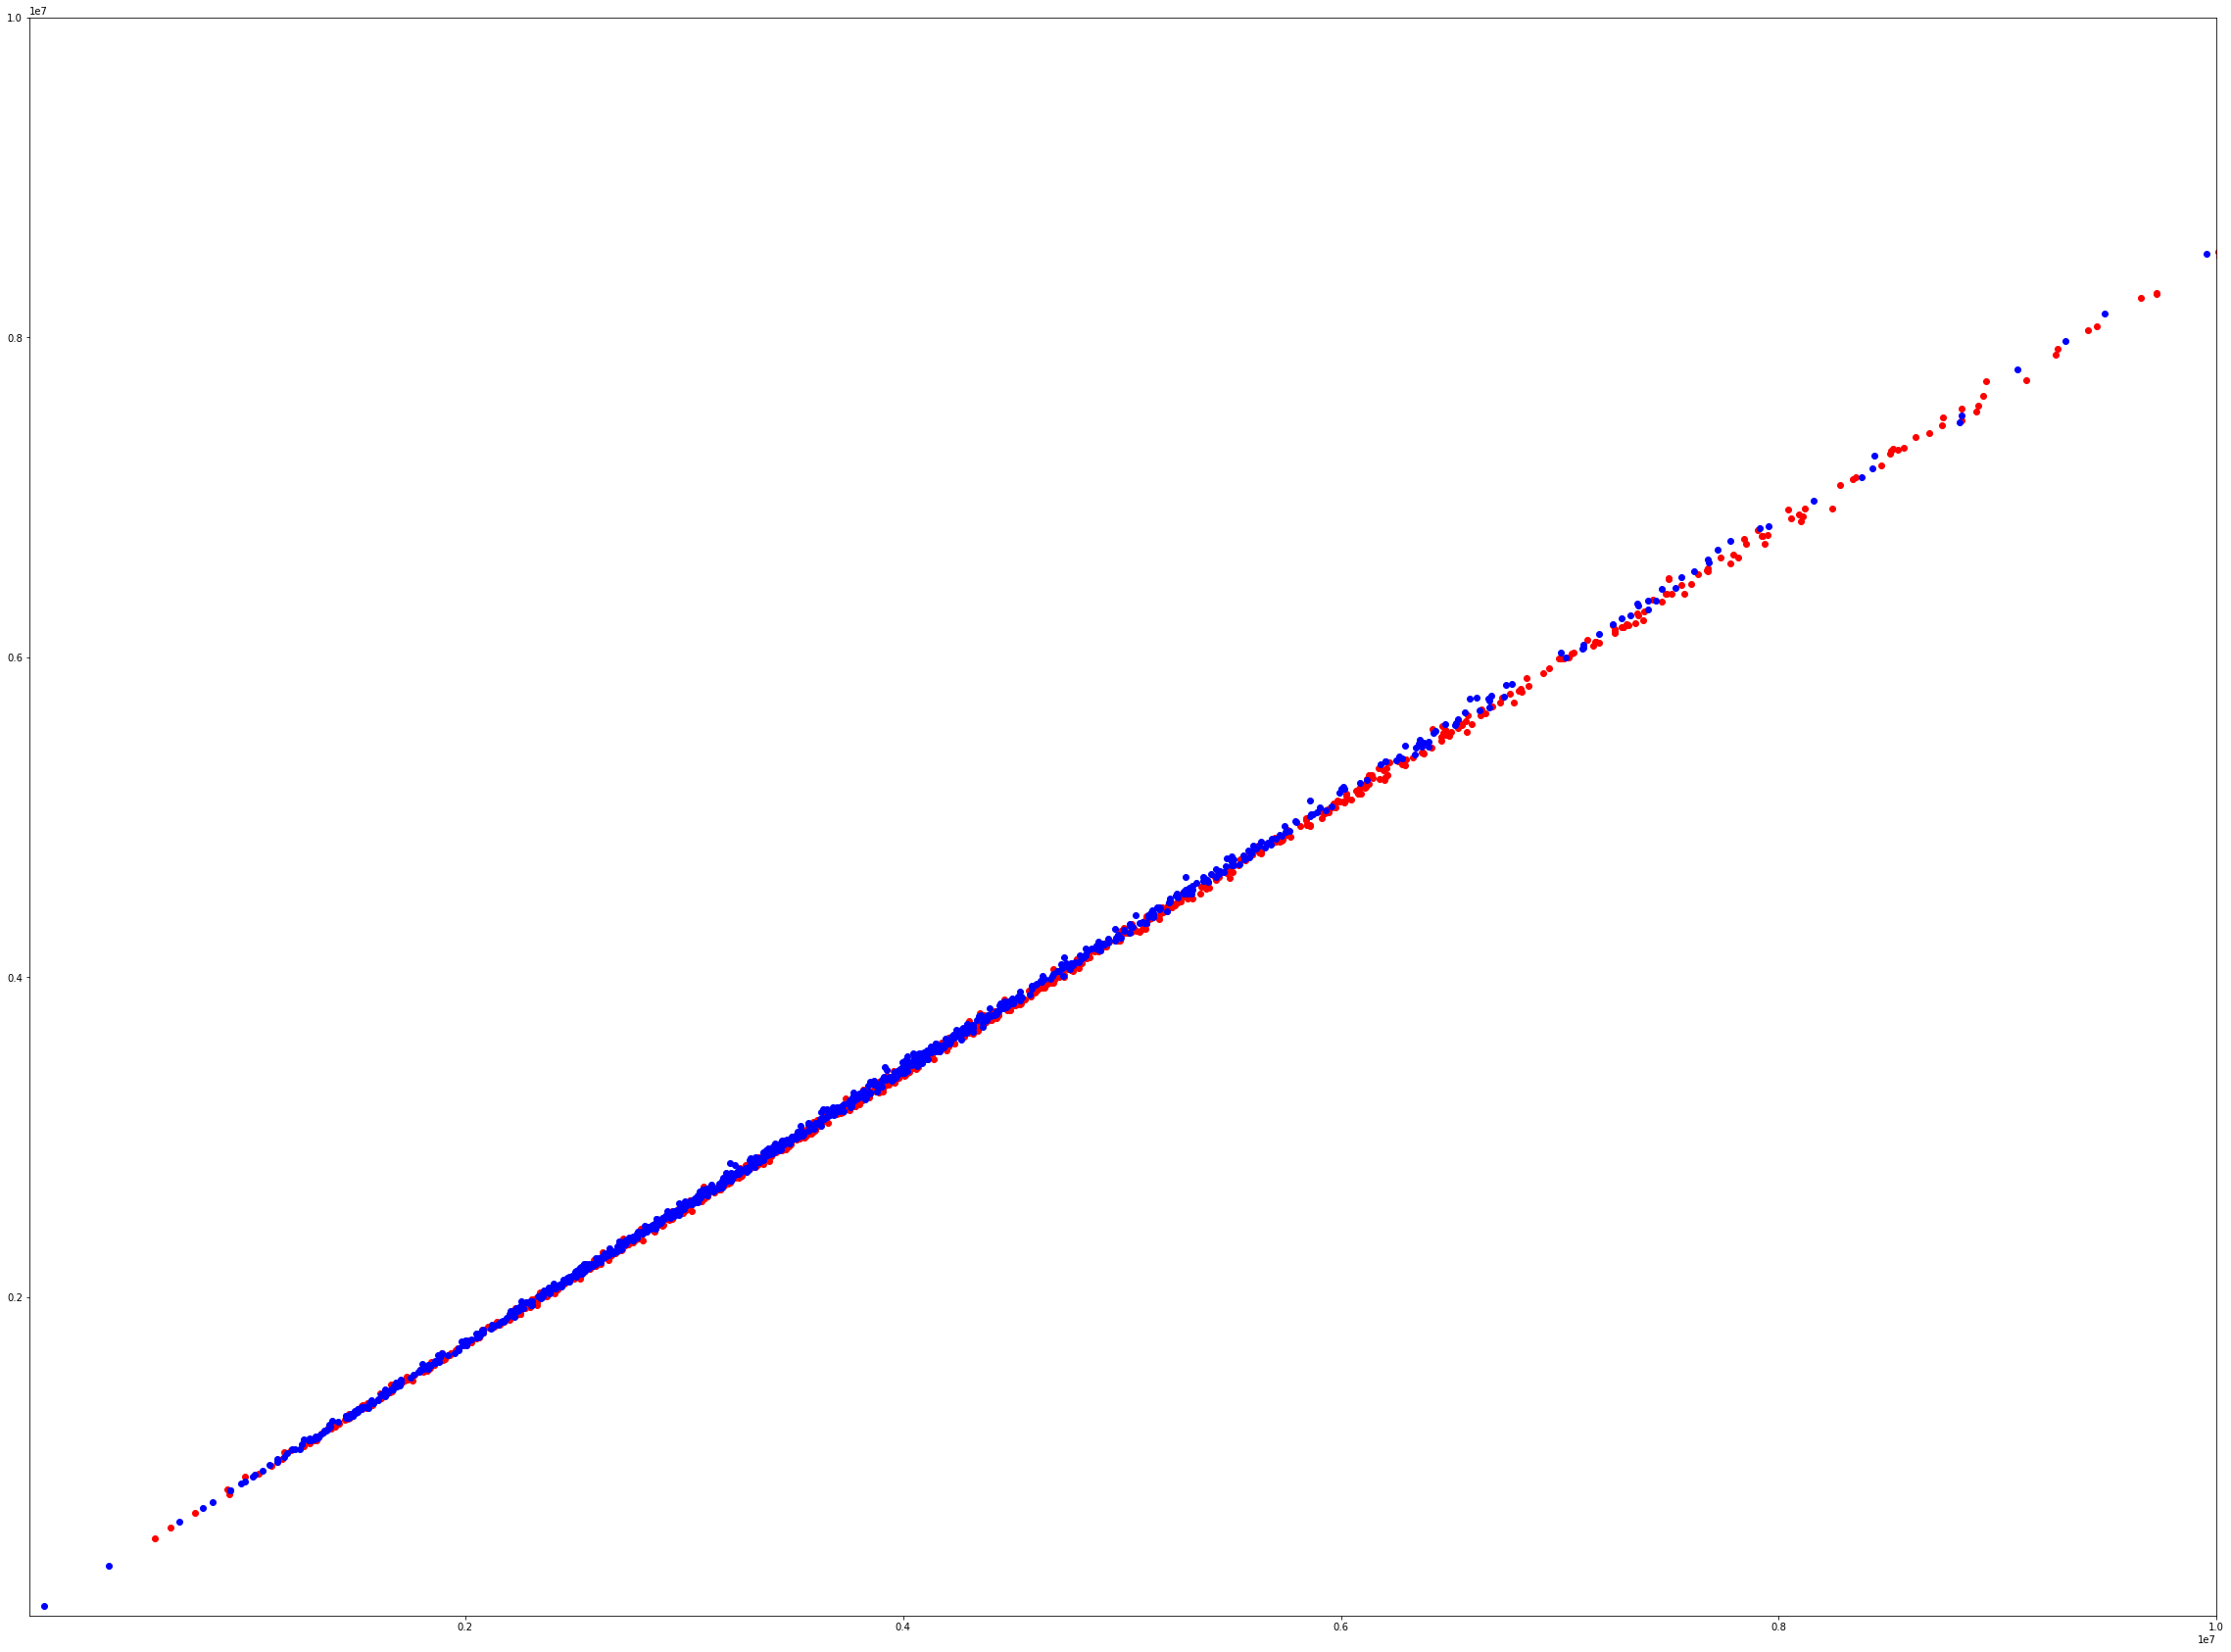

In [49]:
plt.scatter(df['pos_freqs'][0:1000],df['neg_freqs'][0:1000], color='red')
plt.scatter(df['pos_freqs'][1000:2000],df['neg_freqs'][1000:2000], color='blue')

plt.rcParams["figure.figsize"] = (40,30)
plt.xlim(10000,10000000)
plt.ylim(10000,10000000)
plt.show()


In [32]:
features = ['pos_freqs','neg_freqs']
X = df[features]
Y = df['Polarity']
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size = 0.7)


In [33]:
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
metrics.accuracy_score(Y_pred, Y_test) * 100 

68.28571428571428

In [34]:
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
metrics.accuracy_score(Y_pred, Y_test) * 100

55.50000000000001

In [35]:
pos_acc = list(df['pos_freqs'] > df['neg_freqs'])[0:1000]
neg_acc = list(df['pos_freqs'] <= df['neg_freqs'])[1000:2000]
(sum(pos_acc) + sum(neg_acc))/20

50.0

In [36]:
df.head(-5)

,Reviews,Polarity,processed_reviews,pos_freqs,neg_freqs
0,films adapted from comic books have had plenty...,1,"[film, adapted, from, comic, book, have, had, ...",4045520,3455165
1,every now and then a movie comes along from a ...,1,"[every, now, and, then, a, movie, come, along,...",4039111,3439242
2,you've got mail works alot better than it dese...,1,"[got, mail, work, alot, better, than, it, dese...",2863625,2456404
3,""" jaws "" is a rare film that grabs your atten...",1,"[jaw, is, a, rare, film, that, grab, your, att...",6415039,5437455
4,moviemaking is a lot like being the general ma...,1,"[moviemaking, is, a, lot, like, being, the, ge...",4005978,3423814
...,...,...,...,...,...
1990,"man , this was one wierd movie . similar to co...",0,"[man, this, wa, one, wierd, movie, similar, to...",1681205,1465291
1991,"the king and i , a warner brothers animated , ...",0,"[the, king, and, i, a, warner, brother, animat...",5467113,4656455
1992,synopsis : cro-magnon ayla loses her mother to...,0,"[synopsis, ayla, loses, her, mother, to, an, e...",6676457,5731357
1993,salaries of hollywood top actors are getting o...,0,"[salary, of, hollywood, top, actor, are, getti...",1222423,1051061


# Using Word2Vec to represent words, and computing the centroid

In [50]:
import gensim 
from gensim import corpora

In [54]:
dictionary = corpora.Dictionary(df['processed_reviews'])
len(dictionary)

34145

In [55]:
dictionary.token2id

{'00': 0,
 '102': 1,
 '1888': 2,
 '2': 3,
 '30': 4,
 '500': 5,
 'a': 6,
 'abberline': 7,
 'ably': 8,
 'about': 9,
 'absinthe': 10,
 'accent': 11,
 'act': 12,
 'acting': 13,
 'actually': 14,
 'adapted': 15,
 'after': 16,
 'alan': 17,
 'albert': 18,
 'all': 19,
 'allen': 20,
 'almost': 21,
 'amount': 22,
 'an': 23,
 'and': 24,
 'another': 25,
 'anyone': 26,
 'anything': 27,
 'ape': 28,
 'appearance': 29,
 'are': 30,
 'arriving': 31,
 'arthouse': 32,
 'at': 33,
 'attempt': 34,
 'back': 35,
 'bad': 36,
 'batman': 37,
 'be': 38,
 'because': 39,
 'been': 40,
 'before': 41,
 'befriends': 42,
 'behind': 43,
 'better': 44,
 'big': 45,
 'blame': 46,
 'bleak': 47,
 'blindly': 48,
 'block': 49,
 'blow': 50,
 'book': 51,
 'both': 52,
 'bother': 53,
 'briefed': 54,
 'british': 55,
 'brother': 56,
 'brought': 57,
 'burton': 58,
 'but': 59,
 'by': 60,
 'call': 61,
 'called': 62,
 'campbell': 63,
 'can': 64,
 'capable': 65,
 'capture': 66,
 'carrot': 67,
 'carving': 68,
 'case': 69,
 'casper': 70,
 'ca

In [116]:
import warnings 
  
warnings.filterwarnings(action = 'ignore') 
from gensim.models import Word2Vec 

In [117]:
word_vec_size = 100
wordvecs = gensim.models.Word2Vec(df['processed_reviews'], min_count = 1, window = 5, size = word_vec_size)

In [118]:
def compute_wordvec(l):
    avg_arr = np.array(np.repeat(0,word_vec_size))
    for w in l:
        avg_arr = avg_arr + wordvecs.wv[w]
    return avg_arr / word_vec_size



In [119]:
avg_word_vecs = df['processed_reviews'].apply(compute_wordvec)
avg_word_vecs

0       [-0.9746820856862906, 2.2840501015278276, 1.04...
1       [-0.943053635841934, 2.4501354398194235, 1.312...
2       [-0.8963593837979715, 1.6873547472129575, 0.53...
3       [-1.5705387461482314, 4.328491850884748, 1.764...
4       [-0.8097333351679845, 2.4101559005078887, 1.15...
                              ...                        
1995    [-2.4110964641411554, 5.778316581197577, 2.599...
1996    [-1.4526806861395745, 4.3896512253368565, 1.81...
1997    [-0.7418640880775638, 2.1017630840528, 0.47641...
1998    [-0.5638677256111987, 2.0127189896203346, 1.23...
1999    [-0.9157643790671136, 2.3604665164335166, 0.87...
Name: processed_reviews, Length: 2000, dtype: object

In [120]:
df['Avg_word_vecs'] = avg_word_vecs

In [123]:
features = 'Avg_word_vecs'
X = df[features]
Y = df['Polarity']
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size = 0.7)

In [124]:
model = LogisticRegression()
model.fit(X_train.tolist(), Y_train)
Y_pred = model.predict(X_test.tolist())
metrics.accuracy_score(Y_pred, Y_test) * 100 

70.07142857142857